<a href="https://colab.research.google.com/github/JS-DS-coder/CienciaDeDatos2021/blob/master/practica_1_SL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practica 1 - Clustering
Jairo Salazar


# Primera Parte - Hard Clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import matplotlib.colors as mcolors



In [3]:
dataset = pd.read_csv('estaturas.csv')
dataset.columns = ['Estatura', 'Edad']
dataset.head()

,Estatura,Edad
0,1.77,26
1,1.74,31
2,1.72,24
3,1.78,34
4,1.65,32


**Grafica Inicial del archivo**

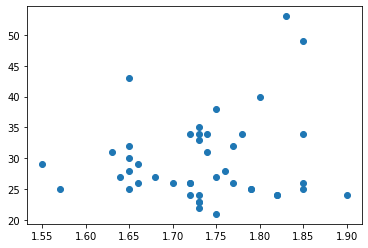

In [4]:
#Scater plot (Estatura vrs edad)
plt.scatter(dataset["Estatura"],dataset["Edad"])
plt.show()

**Algoritmo de Hard clustering**

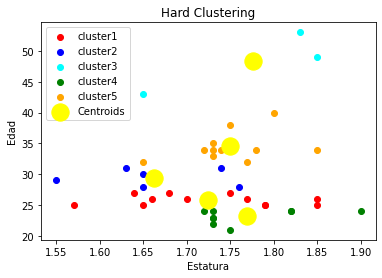

In [86]:
# inicio random de los K centroides
def Centroids (dataset,K):

  Centroids=np.array([]).reshape(dataset.shape[1],0)
  labels = np.array([]).reshape(K,0)
  colores = np.array([]).reshape(K,0)
  for i in range(K):

    filarandom=rd.randint(0,dataset.shape[0]-1)
    colorrandom = rd.randint(0,len(colornames)-1)
    colores = np.append(colores,colornames[colorrandom])
    Centroids=np.c_[Centroids,dataset.iloc[filarandom]]
  return Centroids,labels,colores
#evaluacion de la distancia euclediana                                 
def EuclidianDistance(dataset,K,Centroids):
  EuclidianDistance=np.array([]).reshape(dataset.shape[0],0)
  for k in range(K):
    #se calcula la distancia entre cada punto y cada centroides 
    tempDist=np.sum((dataset-Centroids[:,k])**2,axis=1)
    #se guarda en un vector 
    EuclidianDistance=np.c_[EuclidianDistance,tempDist]
  #se determina a que centroide pertenece cada punto dependienteo de la distancia euclediana
  C=np.argmin(EuclidianDistance,axis=1)+1
  
  return C

#grafica del resultado final
def GraficarClusterin(Centroids,output,K):
  colores=["red","blue","cyan","green","orange","darkgreen","lightcyan","lightcyan"]
  labels=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10']
  for k in range(K):
      plt.scatter(output[k+1][:,0],output[k+1][:,1],c=colores[k],label=labels[k])
  plt.scatter(Centroids[0,:],Centroids[1,:],s=300,c='yellow',label='Centroids')
  plt.xlabel('Estatura')
  plt.ylabel('Edad')
  plt.title("Hard Clustering")
  plt.legend()
  plt.show()

def HardClustering (dataset,K,epoch):
  c,colores,labels = Centroids (dataset,K)
  for i in range(epoch):
   
    for i in range(epoch):
      minEuclodian = EuclidianDistance(dataset,K,c)
      Y={}
      for k in range(K):
          Y[k+1]=np.array([]).reshape(2,0)
      #se crea el dicccionario de centroide y observaciones
      for i in range(dataset.shape[0]):
          Y[minEuclodian[i]]=np.c_[Y[minEuclodian[i]],dataset.iloc[i]]
       
      for k in range(K):
          Y[k+1]=Y[k+1].T
      #Se calcula la media de cada grupo de centroide con el fin de asignar el nuevo
      #centroide hasta que alcanza la convergencia 
      for k in range(K):
        c[:,k]=np.mean(Y[k+1],axis=0)
      Output=Y

  GraficarClusterin(c,Output,K)

HardClustering(dataset,5,20)
#Centroids(dataset,5)


# Algoritmo de Soft Clustering

Se utiliza Gaussian Mixture Model - GMM

In [65]:
from sklearn.mixture import GaussianMixture

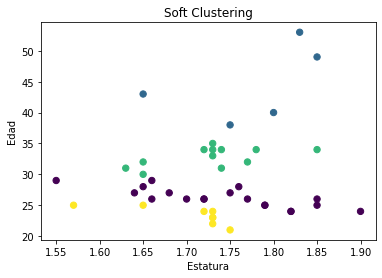

In [77]:
def GMM(dataset, K):
  gmm = GaussianMixture(n_components=K,random_state=0).fit(dataset)
  labels = gmm.predict(dataset)
 
  plt.scatter(dataset["Estatura"], dataset["Edad"], c=labels, s=40, cmap='viridis');
 
  plt.xlabel('Estatura')
  plt.ylabel('Edad')
  plt.title("Soft Clustering")
  plt.show()


GMM(dataset,4)


# **Experimentos**

Experimento 1 

Utilizando 2 Centroides:

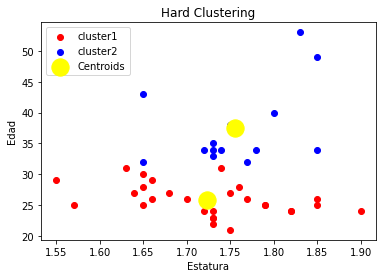

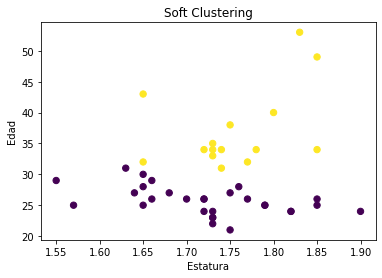

In [79]:
K = 2

HardClustering(dataset,K,20)
GMM(dataset,K)


Experimento 2 - Utilizando 3 centroides

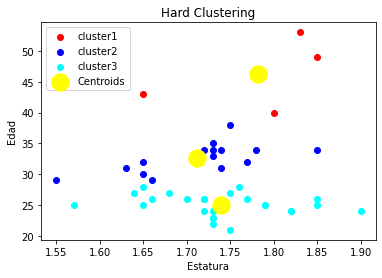

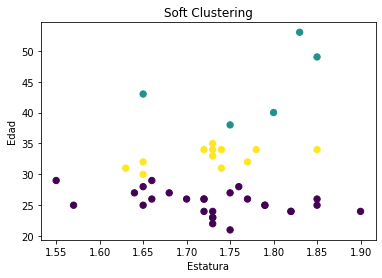

In [80]:
K = 3

HardClustering(dataset,K,20)
GMM(dataset,K)

Experimento 3- Utilizando 4 centroides



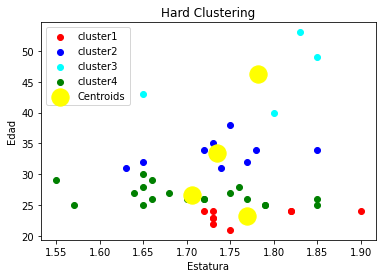

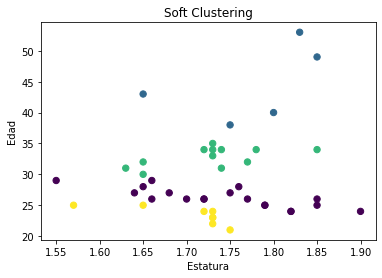

In [81]:
K = 4

HardClustering(dataset,K,20)
GMM(dataset,K)

Experimento 4 - utiliznado 5 centroides

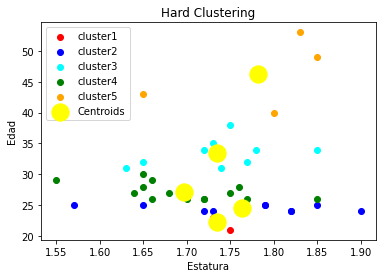

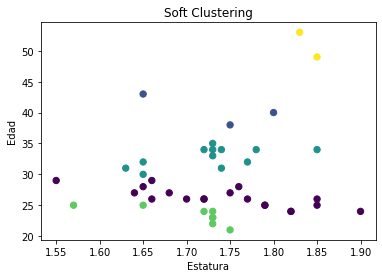

In [87]:
K = 5

HardClustering(dataset,K,20)
GMM(dataset,K)

Experimento 5 - utilizando 6 centroides

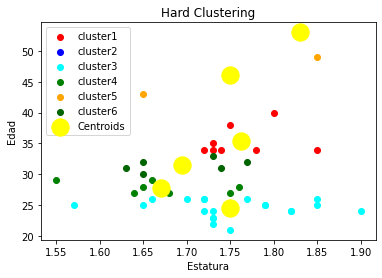

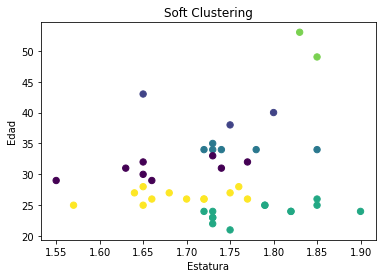

In [89]:
K = 6

HardClustering(dataset,K,20)
GMM(dataset,K)

# Conclusiones

Al utilizar menos centroides, lo que podemos observar es que los estudiantes se asignaban mas que todo por rango de edad y no tanto por Altura. 

Al ir asignando mas centroides, lo observado es que los rangos de edad se inician a dividir tambien por alturas, tambien a mayor numero de centroides, se inician a notar mas las diferencias entre ambos metodos de clustering. 

Llama la atencion que con 5 centroides, podemos observar que la gran mayoria de estudiantes de menos de 25 años, registran alturas mayores al 1.73 metros, los estudiantes de 24 (aproximado) a 26 presentan en su mayoria alturas menores de 1.70 metros, mientras los estudiantes de mayor edad (que son los menos) reportan alturas bastante irregulares sin un claro patron.

# Modelo del codo (Elbow method)

> La idea básica de los algoritmos de clustering es la minimización de la varianza intra-cluster y la maximización de la varianza inter-cluster. Es decir, queremos que cada observación se encuentre muy cerca a las de su mismo grupo y los grupos lo más lejos posible entre ellos.

El método del codo utiliza la distancia media de las observaciones a su centroide. Es decir, se fija en las distancias intra-cluster. Cuanto más grande es el número de clusters k, la varianza intra-cluster tiende a disminuir (Convergen). Cuanto menor es la distancia intra-cluster mejor, ya que significa que los clústers son más compactos. El método del codo busca el valor k que satisfaga que un incremento de k, no mejore sustancialmente la distancia media intra-cluster.

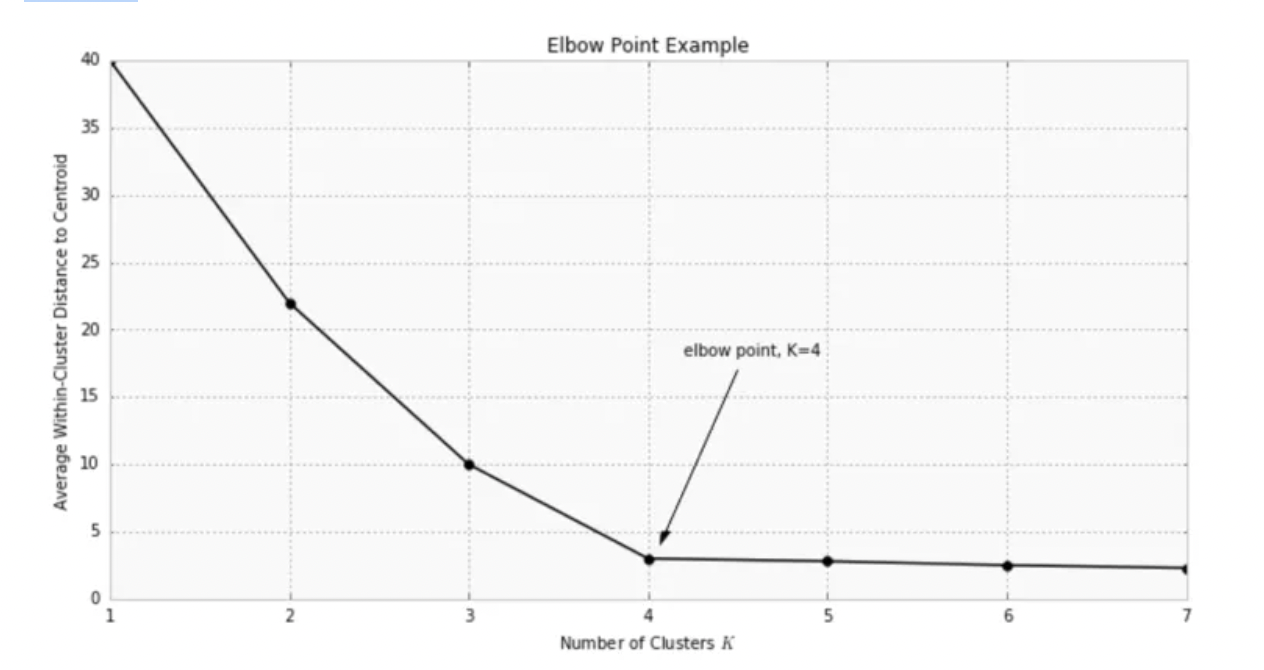

Tiene mucho sentido utilizar el metodo del codo y efectivamente se pudo haber utilizado e implementado con un poco mas de tiempo, de hecho estimo que el numero optimo de cluster se encuentre entre 4 y 5 centroides. como mencione en las conclusiones anteriores, a mayor numero de centroides, los grupos se hacian mas compactos.